# **Import Libarary**

In [133]:
# Manipulasi Data
import pandas as pd 
import numpy as np
import random
np.random.seed(42)
random.seed(42)
import re
import string
import emoji
import csv
import requests
from io import StringIO
import time 

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP & Preprocessing
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Ekstraksi Fitur
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine Learning & Sentiment Analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [96]:
# Download NLTK Resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bagasnuryaman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/bagasnuryaman/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bagasnuryaman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bagasnuryaman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Loading Data**

In [97]:
# Membaca dataset
df = pd.read_csv('ff_scraping.csv')

# Menampilkan nya
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,169fd249-9e14-45b3-9fa5-b004f8792271,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sedih bgt njir, akun aku hilang ud level 40an",2,0,1.109.1,2025-05-20 21:30:40,NaN,NaN,1.109.1
1,a59942c7-c9b3-4ffd-a026-3589cbb5be3c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game bayak buk bintang 1 Update terus buk nya ...,1,1,1.109.1,2025-05-20 21:29:45,NaN,NaN,1.109.1
2,1648cc00-59f2-4dcf-ac05-b974911f3aba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,baguss gamenya,5,0,NaN,2025-05-20 21:22:48,NaN,NaN,NaN
3,b3e7444a-f50c-415a-b030-2eff43d394c9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ehh min lu klo ngasih tim yg ngotak apaa masa ...,1,0,1.109.1,2025-05-20 21:22:35,NaN,NaN,1.109.1
4,66863758-112b-4c94-b583-47b7306f0a6c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus banget game nya,5,0,NaN,2025-05-20 21:19:35,NaN,NaN,NaN


# **Data Preprocessing**

In [98]:
# Menampilkan informasi dari dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  6508 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          7 non-null      object
 9   repliedAt             7 non-null      object
 10  appVersion            6508 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


- Bisa kita lihat ada `Missing Values` pada fitur **reviewCreatedVersion**, **replyContent**, **repliedAt**, dan juga **appVersion**. 
- Disini aku bakal mengambil fitur **Score** dan juga **Content** saja.

## **Mengambil fitur yang akan digunakan saja**

In [99]:
ff_clean = df[['score', 'content']].copy()

## **Penanganan Missing Values**

In [100]:
# Menampilkan Fitur yang missing values
missing_values = ff_clean.isnull().sum()
missing_values_percentage = (missing_values / len(ff_clean)) * 100
missing_values_ff_clean = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase': missing_values_percentage})
print(f'Keseluruhan Missing Values dari dataset ff_clean ini adalah {ff_clean.isnull().sum().sum()}')

# Cek hasil
missing_values_ff_clean

Keseluruhan Missing Values dari dataset ff_clean ini adalah 0


,Jumlah Missing Values,Persentase
score,0,0.0
content,0,0.0


- Soleh Juga gak ada missing values nya.

## **Penanganan Duplikasi Data**

In [101]:
print(f'Jumlah data yang terkena duplikasi data adalah : {ff_clean.duplicated().sum()}')

Jumlah data yang terkena duplikasi data adalah : 1776


- Disini akan aku hapus saja.

In [102]:
ff_clean.drop_duplicates(inplace=True)
print(f'Jumlah data yang terkena duplikasi data adalah : {ff_clean.duplicated().sum()}')

Jumlah data yang terkena duplikasi data adalah : 0


## **Preprocessing Text**

### **Cleaning Text**

In [103]:
# ----- 1. Cleaning Text ------
def clean_text(text):
    """
    Fungsi untuk membersihkan teks dari karakter karakter yang tidak di inginkan seperti angka, simbol, emoji, url, karakter khusus dll.
    """
    text = re.sub(r'@\w+', '', text) # Menghapus mention
    text = re.sub(r'#(\w+)', r'\1', text) # Menghapus hashtag
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Menghapus URL
    text = re.sub(r'\bRT\b', '', text) # Menghapus RT
    text = re.sub(r'\d+', '', text) # Menghapus angka
    text = re.sub(r'\s+', ' ', text) # Menghapus whitespace berlebih
    
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus tanda baca
    text = text.strip() # Menghapus whitespace di awal dan akhir

    # Menghapus emoji
    text = emoji.replace_emoji(text, replace='')
    return text

- Langkah awal untuk `Preprocessing Text` adalah dengan cara membersihkan text dari karakter karakter yang tidak di inginkan seperti angka, emoji, url, simbol, karakter khusus, tanda baca, dll. Makanya itu aku membuat fungsi **`clean_text`**.

### **Case Folding**

In [104]:
# ----- 2. Case Folding -----
def case_folding(text):
    """
    Fungsi untuk mengubah teks menjadi huruf kecil
    """
    return text.lower()

- Langkah keduanya yaitu membuat text atau kalimat kalimat menjadi huruf kecil, karena dalam NLP ini di haruskan banget seragam, maka dari itu aku membuat fungsi **`case_folding`**.

### **Slang Words**

In [ ]:
# ----- 3. Normalisasi Slang Words -----
def normalize_slang(text):
    """
    Fungsi untuk menormalkan kata kata slang/informal menjadi kata baku
    """
    # Kamus slang words untuk Free Fire
    slang_dict = {
        # Game-specific
        'ff': 'free fire', 'epep': 'free fire', 'dm': 'diamond', 'daimen': 'diamond', 'daymen': 'diamond', 'daimon': 'diamond', 'gem': 'game', 'geme': 'game', 'gm': 'game', 'boyah': 'menang', 'mabar': 'main bareng', 'cs': 'clash squad', 'br': 'battle royale', 'citer': 'cheater', 'chiter': 'cheater', 'bewan': 'bermain', 'bundel': 'bundle', 'bandle': 'bundle', 'sg': 'shotgun', 'rank': 'peringkat', 'reng': 'rank', 'renk': 'rank', 'hedsot': 'headshot','hetsot': 'headshot', 'glowal': 'gloo wall', 'gllowal': 'gloo  wall', 'bag': 'bug', 'buk': 'bug', 'afk': 'meninggalkan permainan', 'gg' : 'good game', 'ggwp': 'good game well played', 'gege': 'good game', 'setep': 'step', 'sensi': 'sensitivitas kontrol', 'bot': 'pemain yang tidak handal', 'apdet': 'update', 'apdetan': 'update', 'even': 'event', 'top up': 'isi ulang diamong', 'gameplay': 'cara bermain', 'win': 'menang', 'lose': 'kalah', 'los': 'kalah', 'reload': 'isi ulang peluru', 'damage': 'kerusakan', 'kentang': 'handphone jelek', 'demek': 'damage', 'geme': 'game', 'gem': 'game', 'gamr': 'game', 'mL': 'Mobile Legends', 'ml': 'Mobile Legends', 'santino': 'karakter santino', 'mb': 'megabyte', 'patah patah': 'lag', 'gerafik': 'grafik', 'hetsot': 'headshot', 'prime': 'masa masa jago', 'Ben': 'banned', 'cit': 'cheater', 'match': 'permainan', 'cheater': 'pemain curang', 'chet': 'pemain curang', 'cheat' : 'pemain curang', 'mainin': 'main', 'gegaca': 'gacha', 'yepin': 'ngespin', 'bandel': 'bundle', 'bundle': 'paket', 'toap': 'top up', 'bak': 'bug','nge firzz' : 'lag', 'ngelek': 'lag', 'rangket': 'ranked', 'ranket': 'ranked', 'ranket': 'ranked', 'gameee': 'game', 'gim': 'game', 'war': 'perang', 'iven': 'event', 'kenok': 'knockout', 'games': 'game', 'bl': 'blacklist', 'free frie': 'free fire', 'pus': 'push',  'cs': 'clash squad', 'dem': 'diamond', 'eff': 'free fire', 'abdet': 'update', 'gaca': 'gacha', 'geam': 'game', 

        # Kata Kata Umum, singkatan dan juga typo
        'gw': 'saya', 'gue': 'saya', 'aku': 'saya', 'lu': 'kamu', 'lo': 'kamu', 'aja': 'saja', 'aj': 'saja', 'kalo': 'kalau', 'klo': 'kalau', 'klu': 'kalau',  'bgt': 'banget', 'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'gk': 'tidak', 'ngga': 'tidak', 'nggak': 'tidak', 'udah': 'sudah', 'udh': 'sudah','dah': 'sudah', 'nih': 'ini', 'emg': 'memang', 'emang': 'memang', 'kyk': 'seperti', 'kyak': 'seperti', 'kek': 'seperti', 'dgn': 'dengan', 'sm': 'sama', 'tp': 'tapi', 'tpi': 'tapi', 'pake': 'pakai', 'pakek': 'pakai','ngelag': 'lag', 'nglag': 'lag', 'leg': 'lag', 'burik': 'grafiknya jelek', 'bgus': 'bagus', 'bgs': 'bagus', 'baguss': 'bagus', 'mantep': 'mantap', 'mantap': 'sangat bagus', 'seru': 'menyenangkan', 'yah': 'ya', 'krn': 'karena', 'min': 'admin', 'plis': 'tolong', 'pliss': 'tolong', 'tlg': 'tolong', 'jgn': 'jangan', 'bocil': 'anak kecil', 'ud': 'sudah', 'maen': 'main', 'ngasih': 'memberi', 'ngotak': 'masuk akal', 'mulu': 'terus', 'stuk': 'terjebak', 'ganiat': 'tidak niat', 'gausah': 'tidak usah', 'di bukan': 'di buka', 'ngebantu': 'membantu', 'pingin': 'ingin', 'mlah': 'malah', 'dapet': 'dapat', 'mayan': 'lumayan', 'effort': 'usaha', 'berdamage': 'berdampak', 'kasih': 'beri', 'yok': 'ayo', 'yuk': 'ayo', 'comeback': 'kembali', 'apus': 'hapus', 'kayak': 'seperti', 'jir': 'aduh', 'njir': 'aduh', 'anjir': 'aduh', 'hoki': 'keberuntungan', 'smoth': 'halus', 'smooth': 'halus', 'smpai': 'sampai', 'smp': 'sampai', 'smpe': 'sampai', 'sampe': 'sampai', 'hamdeh': 'aduh', 'gak': 'tidak', 'tolol': 'bodoh', 'bodo': 'bodoh', 'moga': 'semoga', 'ngeleg': 'lag', 'karna' : 'karena', 'MLah': 'malah', 'even': 'event', 'event': 'acara', 'sanat': 'sana', 'kayae': 'seperti', 'kaya': 'seperti', 'kya': 'seperti', 'kyae': 'seperti', 'kentang': 'jelek', 'HP': 'handphone', 'masi': 'masih', 'setiah': 'setia', 'kengan' : 'kenangan', 'keluarin': 'mengeluarkan', 'gk': 'tidak', 'nggk': 'tidak', 'ga' : 'tidak', 'bnyk': 'banyak', 'kasi': 'beri', 'ny': 'nya', 'zeru': 'seru', 'banyakk': 'banyak', 'mental': 'terlempar', 'lian' : 'lain', 'turunni': 'turunin', 'plisss': 'tolong', 'ae': 'saja', 'pensi': 'vakum', 'ya': 'nya', 'guwa': 'saya', 'dongo': 'bodoh', 'amat': 'sangat', 'yt': 'youtube', 'patah': 'lag', 'kaga': 'tidak', 'su': 'goblok', 'dri': 'dari', 'pensii': 'vakum', 'terjebak': 'terjelek', 'hanam': 'haram', 'bgke': 'bangke', 'kntl': 'kontol', 'mlu' : 'mulu', 'mulu': 'terus', 'gaada': 'gak ada', 'batu': 'baju', 'susahin': 'menyusahkan', 'uwang': 'uang', 'mininggal': 'meninggal', 'kuren': 'keren', 'anjg': 'anjing', 'kalo': 'kalau', 'jetemu': 'ketemu', 'booooot': 'bot', 'bot': 'pemain Ai', 'sya': 'saya', 'mud': 'mood', 'iclik': 'licik', 'salakan': 'salahkan', 'trimakasi': 'terimakasih', 'knp': 'kenapa', 'mw': 'mau', 'bok': 'bot', 'sip': 'bagus', 'merah': 'murah', 'pulak': 'pula', 'geratis': 'gratis', 'bg': 'bang', 'ad': 'ada', 'gwh': 'saya', 'kenaben': 'ke banned', 'totong': 'tolong', 'langsun': 'langsung', 'lgi': 'lagi', 'g': 'tidak', 'manuk': 'masuk', 'gua': 'saya', 'mh': 'mah', 'old': 'dulu', 'samph' : 'sampah', 'kikir': 'pelit', 'kandang': 'kadang', 'sampek': 'sampai', 'tebel': 'tebal', 'iklas': 'ikhlas', 'kek': 'seperti', 'curi': 'mencuri', 'mlh': 'malah', 'kyk': 'seperti', 'bnggt': 'banget', 'ngebak' : 'bug', 'gra fiknya': 'grafiknya', 'gimna': 'bagaimana', 'gmn': 'bagaimana', 'gimn': 'bagaimana', 'taik': 'tai', 'mening': 'mendingan', 'gra gra': 'gara gara', 'bgt': 'banget', 'ultah': 'ulang tahun', 'ajah': 'saja', 'defloper': 'developer', 'kukasi': 'aku beri', 'bitang': 'bintang', 'kn': 'kan', 'pin': 'ingin', 'ploplayer': 'proplayer', 'proplayer': 'pemain pro', 'jga': 'juga', 'baywan': 'by one', 'by one': 'satu lawan satu', 'bkn': 'bukan', 'don': 'dong', 'knapa': 'kenapa', 'kebalikan': 'kembalikan', 'kau': 'kamu', 'kalaw': 'kalau', 'donlod': 'download', 'donlot': 'download', 'donload': 'download', 'donlod': 'download', 'donlot': 'download', 'donloud': 'download', 'donloud': 'download', 'bet': 'banget', 'collab' : 'kolaborasi',
    }
    
    # Membuat kata kata menjadi lowercase
    words = text.lower().split()
    
    # Normalisasi setiap kata
    normalized_words = []
    for word in words:
        # Jika kata ada dalam kamus slang, ganti dengan kata bakunya
        if word in slang_dict:
            normalized_words.append(slang_dict[word])
        else:
            normalized_words.append(word)
    
    # Gabungkan kembali kata-kata menjadi teks
    return ' '.join(normalized_words)


- Langkah ketiga adalah kita harus mengganti kata kata yang informal seperti singkatan, dan bahasa gaul menjadi kata kata yang baku, dan juga pasti ada typo nah kita juga harus membersihkan dan mengganti dengan kalimat atau kata kata yang benar, makanya dari itu aku bikin sebuah fungsi yang bernama **`normalize_slang`**.

> **ANNOUNCEMENT**

- Tapi yang perlu garis bawahi adalah kata kata typo dan slangwords ini pasti banyak, aku hanya mencoba untuk mengganti beberapa kata kata yang umum digunakan, karena keterbatasan waktu dan aku adalah manusia tidak mungkin untuk satu satu melihat review dan mengganti kata kata yang typo atau slangwordsnya.

### **Tokenization**

In [106]:
# ----- 4. Tokenization -----
def tokenization(text):
    """
    Fungsi untuk mmemecah teks atau membagi teks menjadi daftar akata atau token
    """
    token = word_tokenize(text)
    return token

- Langkah ke 4 adalah kita harus memecah teks atau kalimat menjadi daftar kata atau token yang bermakna, ini langkah yang harus di lakukan karena kalau tidak kita tidak bisa melanjutkan ke langkah berikutnya. 

### **StopWords**

In [107]:
# ----- 5. Stopword Removal -----
def filtering_stopwords(tokens):
    """
    Fungsi untuk mengganti kata kata umum yang kurang bermakna dari daftar token
    """
    listStopWords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    custom_stopwords = [
        'iya', 'yaa', 'gak', 'nga', 'gk', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 
        'gaa', 'loh', 'kah', 'woi', 'woii', 'woy', 'dong', 'deh', 'nih', 'sih',
        'kok', 'kek', 'cuma', 'doang', 'banget', 'aja', 'doank', 'bgt', 'yg', 'udah',
        'udh', 'dah', 'tuh', 'gitu', 'gini', 'emang', 'emg', 'kan', 'kalo', 'klo',
        'yah', 'si', 'tau', 'gw', 'gue', 'ane', 'lu', 'lo', 'wkwk', 'wkwkwk', 'xixi',
        'haha', 'hehe', 'tp', 'tapi', 'karna', 'krn', 'biar', 'ehh', 'eh'
    ]

    listStopWords.update(custom_stopwords)
    listStopWords.update(listStopwords1)
    filtered = []
    for txt in tokens:
        if txt not in listStopWords:
            filtered.append(txt)
    tokens = filtered
    return tokens

- Pada tahapan ke 5 ini, kita harus mencari kata kata yang umum dan sering muncul dalam teks atau sutau kalimat tapi tidak bermakna dan tidak berkontribusi apapun di dalam hasil pemodelan. Contohnya kata **dan**, **yang**, **di** dll. Jadi intinya seperti ini aja deh, Menghapus kata kata yang tidak relevan agar analisis menjadi lebih fokus pada kata kata yang bermakna.

### **Stemming**

In [108]:
# ----- 6. Stemming -----
def stemming(tokens):
    """
    Fungsi untuk mengubah daftar kata atau token menjadi bentuk dasarnya menggunakan Sastrawi karena bahasa Indonesia
    """
    # Membuat objek stemmer 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Melakukan stemming pada setiap token dengan list comprehension
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

- Langkah ke 6 adalah `Stemming`, berfungsi untuk menyederhanakan kata ke bentuk dasarnya, agar model bisa memahami teks dengan lebih efisien dan akurat.

### **Joining**

In [109]:
# ----- 7. Join Tokens to Text -----
def to_sentence(tokens):
    """
    Fungsi untuk menggabungkan token menjadi kalimat
    """
    return " ".join(tokens)


- Langkah terakhir adalah menggabungkan daftar kata kata menjadi sebuah kalimat utuh lagi, karena tadi kan kita pecah pecah, dan terakhir digabungkan kembali.

### **Penerapan Function**

In [110]:
def preprocessing_text(dataset):
    """
    Menerapkan pipeline preprocessing text pada dataset dengan analisis missing values.
    """

    df = dataset.copy()
    total_data = len(df)

    print(f'Memulai preprocessing untuk {total_data} data ulasan Free Fire\n')
    
    # Fungsi untuk memeriksa dan melaporkan missing values
    def check_missing(df, column_name):
        missing = df[column_name].isna().sum()
        empty = (df[column_name].astype(str) == '').sum()
        total_invalid = missing + empty
        percent = (total_invalid / len(df)) * 100
        
        print(f'Status data: {len(df)-total_invalid} valid, {total_invalid} missing/empty ({percent:.2f}%)')
        return total_invalid

    try:
        # 1. Cleaning Text
        df['clean_text'] = df['content'].apply(clean_text)
        check_missing(df, 'clean_text')
        print(f'Proses Cleaning Text done Mamang!!!\n')

        # 2. Case Folding
        df['case_foldingText'] = df['clean_text'].apply(case_folding)
        check_missing(df, 'case_foldingText')
        print(f'Proses Case Folding done Mamang!!!\n')

        # 3. Normalisasi Slang Words 
        df['normalized_slangwordsText'] = df['case_foldingText'].apply(normalize_slang)
        check_missing(df, 'normalized_slangwordsText')
        print(f'Proses Normalisasi Slang Words done Mamang!!!\n')

        # 4. Tokenizing
        df['tokenized_text'] = df['normalized_slangwordsText'].apply(tokenization)

        # Untuk kolom list, periksa list kosong
        tokenize_empty = sum(1 for x in df['tokenized_text'] if not x)
        print(f'Status data: {len(df)-tokenize_empty} valid, {tokenize_empty} empty lists ({tokenize_empty/len(df)*100:.2f}%)')
        print(f'Proses Tokenizing done Mamang!!!\n')

        # 5. Stopword Removal
        df['stopword_removedText'] = df['tokenized_text'].apply(filtering_stopwords)
        stopword_empty = sum(1 for x in df['stopword_removedText'] if not x)
        print(f'Status data: {len(df)-stopword_empty} valid, {stopword_empty} empty lists ({stopword_empty/len(df)*100:.2f}%)')
        print(f'Proses Stopword Removal done Mamang!!!\n')

        # 6. Stemming
        df['stemmed_text'] = df['stopword_removedText'].apply(stemming)
        stemming_empty = sum(1 for x in df['stemmed_text'] if not x)
        print(f'Status data: {len(df)-stemming_empty} valid, {stemming_empty} empty lists ({stemming_empty/len(df)*100:.2f}%)')
        print(f'Proses Stemming done Mamang!!!\n')

        # 7. Join Tokens to Text
        df['final_text'] = df['stemmed_text'].apply(to_sentence)
        final_missing = check_missing(df, 'final_text')
        print(f'Proses Join Tokens to Text done Mamang!!!\n')

        # Ringkasan hasil preprocessing
        print('RINGKASAN HASIL PREPROCESSING:')
        print(f'Total data awal: {total_data}')
        print(f'Total data valid setelah preprocessing: {total_data - final_missing}')
        print(f'Total data invalid/kosong: {final_missing} ({final_missing/total_data*100:.2f}%)')
        
        # Analisis data yang hilang di tahap akhir (opsional)
        if final_missing > 0:
            print('\nAnalisis data kosong:')
            empty_indices = df[df['final_text'] == ''].index
            for idx in empty_indices[:min(3, len(empty_indices))]:
                print(f'\nData kosong #{idx}:')
                print(f'Teks asli: {df["content"].iloc[idx]}')
                print(f'Setelah cleaning: {df["clean_text"].iloc[idx]}')
                
        print(f'\nPREPROCESSING SELESAI MAMANG!')
        
    except Exception as e:
        print(f'\nWalawe Terjadi error pada preprocessing Mamang: {str(e)}')
        
    return df

In [111]:
# Implementasi Function
process_df = preprocessing_text(ff_clean)
process_df.head()

Memulai preprocessing untuk 8224 data ulasan Free Fire

Status data: 8155 valid, 69 missing/empty (0.84%)
Proses Cleaning Text done Mamang!!!

Status data: 8155 valid, 69 missing/empty (0.84%)
Proses Case Folding done Mamang!!!

Status data: 8154 valid, 70 missing/empty (0.85%)
Proses Normalisasi Slang Words done Mamang!!!

Status data: 8154 valid, 70 empty lists (0.85%)
Proses Tokenizing done Mamang!!!

Status data: 8116 valid, 108 empty lists (1.31%)
Proses Stopword Removal done Mamang!!!

Status data: 8116 valid, 108 empty lists (1.31%)
Proses Stemming done Mamang!!!

Status data: 8111 valid, 113 missing/empty (1.37%)
Proses Join Tokens to Text done Mamang!!!

RINGKASAN HASIL PREPROCESSING:
Total data awal: 8224
Total data valid setelah preprocessing: 8111
Total data invalid/kosong: 113 (1.37%)

Analisis data kosong:

Data kosong #17:
Teks asli: ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐😼⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐💛⭐⭐⭐⭐⭐⭐⭐⭐😼⭐⭐😼⭐🌛⭐⭐😼⭐😼⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐🌟⭐⭐⭐⭐⭐⭐🌟⭐⭐⭐⭐⚡⭐⭐⭐⭐⭐⭐🎊⭐⭐⭐⭐⭐⭐💛⭐⭐⭐⭐⭐⭐⭐⭐⭐🌝⭐⭐⭐⭐🌛⭐⭐⭐🕳️🌜⭐⭐⭐⭐⭐⭐⭐

,score,content,clean_text,case_foldingText,normalized_slangwordsText,tokenized_text,stopword_removedText,stemmed_text,final_text
0,2,"sedih bgt njir, akun aku hilang ud level 40an",sedih bgt njir akun aku hilang ud level an,sedih bgt njir akun aku hilang ud level an,sedih banget aduh akun saya hilang sudah level an,"[sedih, banget, aduh, akun, saya, hilang, suda...","[sedih, aduh, akun, hilang, level]","[sedih, aduh, akun, hilang, level]",sedih aduh akun hilang level
1,1,game bayak buk bintang 1 Update terus buk nya ...,game bayak buk bintang Update terus buk nya ng...,game bayak buk bintang update terus buk nya ng...,game bayak bug bintang update terus bug nya ti...,"[game, bayak, bug, bintang, update, terus, bug...","[game, bayak, bug, bintang, update, bug, perba...","[game, bayak, bug, bintang, update, bug, baik,...",game bayak bug bintang update bug baik bug dam...
2,5,baguss gamenya,baguss gamenya,baguss gamenya,bagus gamenya,"[bagus, gamenya]","[bagus, gamenya]","[bagus, gamenya]",bagus gamenya
3,1,ehh min lu klo ngasih tim yg ngotak apaa masa ...,ehh min lu klo ngasih tim yg ngotak apaa masa ...,ehh min lu klo ngasih tim yg ngotak apaa masa ...,ehh admin kamu kalau memberi tim yang masuk ak...,"[ehh, admin, kamu, kalau, memberi, tim, yang, ...","[admin, tim, masuk, akal, apaa, main, clash, s...","[admin, tim, masuk, akal, apaa, main, clash, s...",admin tim masuk akal apaa main clash squad eli...
4,5,bagus banget game nya,bagus banget game nya,bagus banget game nya,bagus banget game nya,"[bagus, banget, game, nya]","[bagus, game]","[bagus, game]",bagus game


- Dan alhamdulillah hasilnya lancar dan aman ya, tapi masalahnya disini ada missing values nih setelah kita melakukan preprocessing kepada text, kemungkinan ini adalah emoji emoji yang di replace menjadi nilai yang kosong, maka dari itu kita akan menghapusnya saja.

In [112]:
# Menghapus data yang missing values
def clean_missing_values(dataset):
    """
    Fungsi untuk menghapus baris dengan missing values pada kolom final_text atau score
    dan menampilkan informasi tentang data yang dihapus
    """
    print('MEMBERSIHKAN DATA DARI MISSING VALUES')
    
    # Simpan jumlah data awal
    total_awal = len(dataset)
    print(f'Total data awal: {total_awal}')
    
    # Cek missing values pada kedua kolom penting
    missing_text = process_df['final_text'].astype(str).str.strip().eq('').sum()
    missing_score = process_df['score'].isna().sum()
    
    print(f'Data dengan teks kosong: {missing_text} ({missing_text/total_awal*100:.2f}%)')
    print(f'Data dengan score kosong: {missing_score} ({missing_score/total_awal*100:.2f}%)')
    
    # Tampilkan distribusi score sebelum pembersihan
    print('\nDistribusi score sebelum pembersihan:')
    score_counts = process_df['score'].value_counts(dropna=False)
    for score, count in score_counts.items():
        print(f'Score {score}: {count} ({count/total_awal*100:.2f}%)')
    
    # Hapus baris dengan teks kosong atau score NaN
    process_process_df = process_df[(process_df['final_text'].astype(str).str.strip() != '') & 
                (~process_df['score'].isna())].copy()
    
    # Hitung jumlah data yang dihapus
    total_bersih = len (process_process_df)
    total_dihapus = total_awal - total_bersih
    
    print(f'\nTotal data setelah pembersihan: {total_bersih}')
    print(f'Total data yang dihapus: {total_dihapus} ({total_dihapus/total_awal*100:.2f}%)')
    
    # Tampilkan distribusi score setelah pembersihan
    print('\nDistribusi score setelah pembersihan:')
    score_counts_clean = process_process_df['score'].value_counts()
    for score, count in score_counts_clean.items():
        print(f'  Score {score}: {count} ({count/total_bersih*100:.2f}%)')
    
    # Reset index
    process_process_df = process_process_df.reset_index(drop=True)
    
    print('\nPembersihan data selesai Mamang! Data siap untuk pemodelan.')
    
    return process_process_df

# Jalankan fungsi untuk membersihkan data
df_clean = clean_missing_values(process_df)

MEMBERSIHKAN DATA DARI MISSING VALUES
Total data awal: 8224
Data dengan teks kosong: 131 (1.59%)
Data dengan score kosong: 0 (0.00%)

Distribusi score sebelum pembersihan:
Score 5: 5067 (61.61%)
Score 1: 1885 (22.92%)
Score 4: 550 (6.69%)
Score 3: 387 (4.71%)
Score 2: 335 (4.07%)

Total data setelah pembersihan: 8093
Total data yang dihapus: 131 (1.59%)

Distribusi score setelah pembersihan:
  Score 5: 4960 (61.29%)
  Score 1: 1873 (23.14%)
  Score 4: 543 (6.71%)
  Score 3: 385 (4.76%)
  Score 2: 332 (4.10%)

Pembersihan data selesai Mamang! Data siap untuk pemodelan.


- Sudah aman ya sekarang sudah jauh dari missing_values

# **Pelabelan**

### **Mengambil kamus kata positif dan negatif Bahasa Indonesia**

In [113]:
# Membaca data kamus kata kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print('Failed to fetch positive lexicon data')
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print('Failed to fetch negative lexicon data')

- Sebenarnya kode ini adalah kode dari materi, tapi karena menurut aku menarik dan ingin mencobanya sekalian saja aku coba di submission ini, intinya kode ini berfungsi untuk membangun dua kamus sentimen (positive dan negative) dari github yang bernama lexicon.  

### **Membuat Function Analisis Sentimen**

In [114]:
# Menggunakan Fungsi analisis_sentimen_lexcion
def analisis_sentimen_lexcion(tokens, lexicon_positive, lexicon_negative):
    """
    Fungsi ini digunakan untuk melakukan analisis sentimen pada tokens berdasarkan leksikon.
    Menggunakan stemmed_text yang sudah dibersihkan stopwords. Izin ambil dari materi ya para reviewer.
    """
    if not tokens or not isinstance(tokens, list):
        return 'netral'
    
    # Inisialisasi skor
    pos_score = 0
    neg_score = 0
    
    for word in tokens:
        if word in lexicon_positive:
            pos_score += lexicon_positive[word]
        if word in lexicon_negative:
            neg_score += lexicon_negative[word]  
    
    # Final score adalah jumlah semua skor
    final_score = pos_score + neg_score  
    
    if final_score > 0:
        return 'positif'
    elif final_score < 0:
        return 'negatif'
    else:
        return 'netral'

- Ini hanya penerapan funcition saja.

### **Penerapan Function**

In [115]:
# Menerapkan Function yang sudah di buat
df_clean['sentiment'] = df_clean['stemmed_text'].apply(
    lambda tokens: analisis_sentimen_lexcion(tokens, lexicon_positive, lexicon_negative)
)

# Lihat distribusi hasil sentimen
sentiment_distribution = df_clean['sentiment'].value_counts()
print('\nDistribusi Sentimen:')
for sentiment, count in sentiment_distribution.items():
    print(f'  {sentiment}: {count}')


Distribusi Sentimen:
  positif: 3665
  negatif: 2782
  netral: 1646


- Ini lah hasilnya dengan Review **Negatif** sebanyak : 3655, Review **Positif** sebanyak : 2782, Review **Netral** sebanyak : 1646. Dapat aku katakan ini adalah hasil yang bagus, karena cukup seimbang dan tidak condong kepada satu sentiment saja.
- Pemain FF toxic toxic sih buset wkwk.

### **Visualisasi Sentiment**

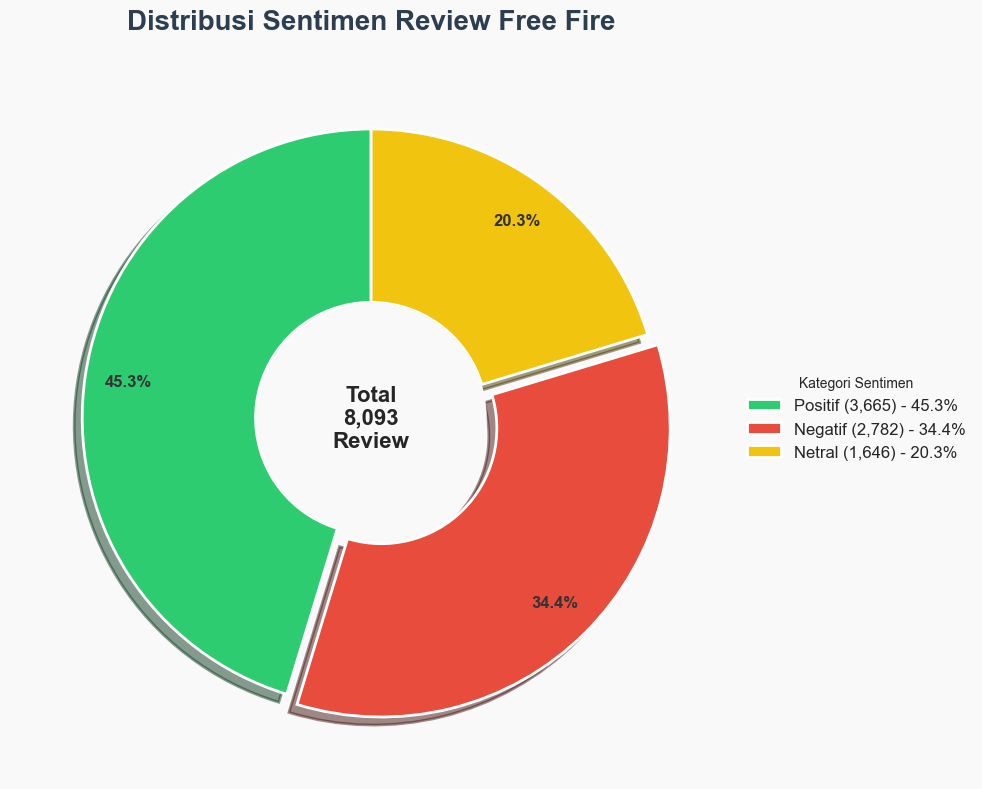

In [116]:
# Setup style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Menyiapkan data untuk visualisasi menggunakan piechart
sentiment_counts = df_clean['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
percentages = [f'{(x/sum(sizes)*100):.1f}%' for x in sizes]

# Ilmu dulu ketika membuat web kita pake wkwk
colors = {
    'positif': '#2ecc71',  # Hijau
    'negatif': '#e74c3c',  # Merah
    'netral': '#f1c40f'    # Kuning
}

# Mengurutkan warna yang sesuai dengan urutan label
color_list = [colors[label] for label in labels]

# Mengatur explode untuk efek visual
explode = [0.05 if label == 'negatif' else 0 for label in labels]

# Membuat subplots
fig, ax = plt.subplots(figsize=(16, 8), facecolor='#f9f9f9')
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=None,  # Hapus labels bawaan
    autopct=lambda pct: f'{pct:.1f}%',
    explode=explode,
    colors=color_list,
    startangle=90,
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'width': 0.6, 'linewidth': 2},
    pctdistance=0.85,
    textprops={'fontsize': 14, 'fontweight': 'bold', 'color': '#333333'}
)

# Menambahkan label ke wedges
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Membuat lubang donat 
centre_circle = plt.Circle((0, 0), 0.4, fc='#f9f9f9')
ax.add_artist(centre_circle)

# Menambahkan judul dan juga styling
ax.set_title('Distribusi Sentimen Review Free Fire', 
             fontsize=20, 
             fontweight='bold', 
             pad=20, 
             color='#2c3e50')

# Menambahkan legend dengan informasi jumlah
legend_labels = [f'{label.capitalize()} ({size:,}) - {pct}' 
                for label, size, pct in zip(labels, sizes, percentages)]
ax.legend(wedges, legend_labels, 
          title='Kategori Sentimen',
          loc='center left', 
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12)

# Ini pemanis saja sih biar tengah donat nya gak kosong
total_reviews = sum(sizes)
ax.text(0, 0, f'Total\n{total_reviews:,}\nReview', 
        ha='center', va='center', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('sentiment_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

- Bisa kita lihat pada visualisasi pie chart di atas, di temukan bahwa sentiment di dominasi oleh review negatif dengan 45,3% proporsi. dan yang lainnya seperti positif dan juga netral hampir setara cuma selisih 14% doang. Maka dari itu kita simpulkan bahwa aplikasi free fire ini sering mendapatkan komplain dari usernya sendiri dan terbukti sih emang seperti itu pemain free fire rata rata terlalu toxic dan masih anak di bawah umur lagi.

### **Eksplorasi Sentiment**

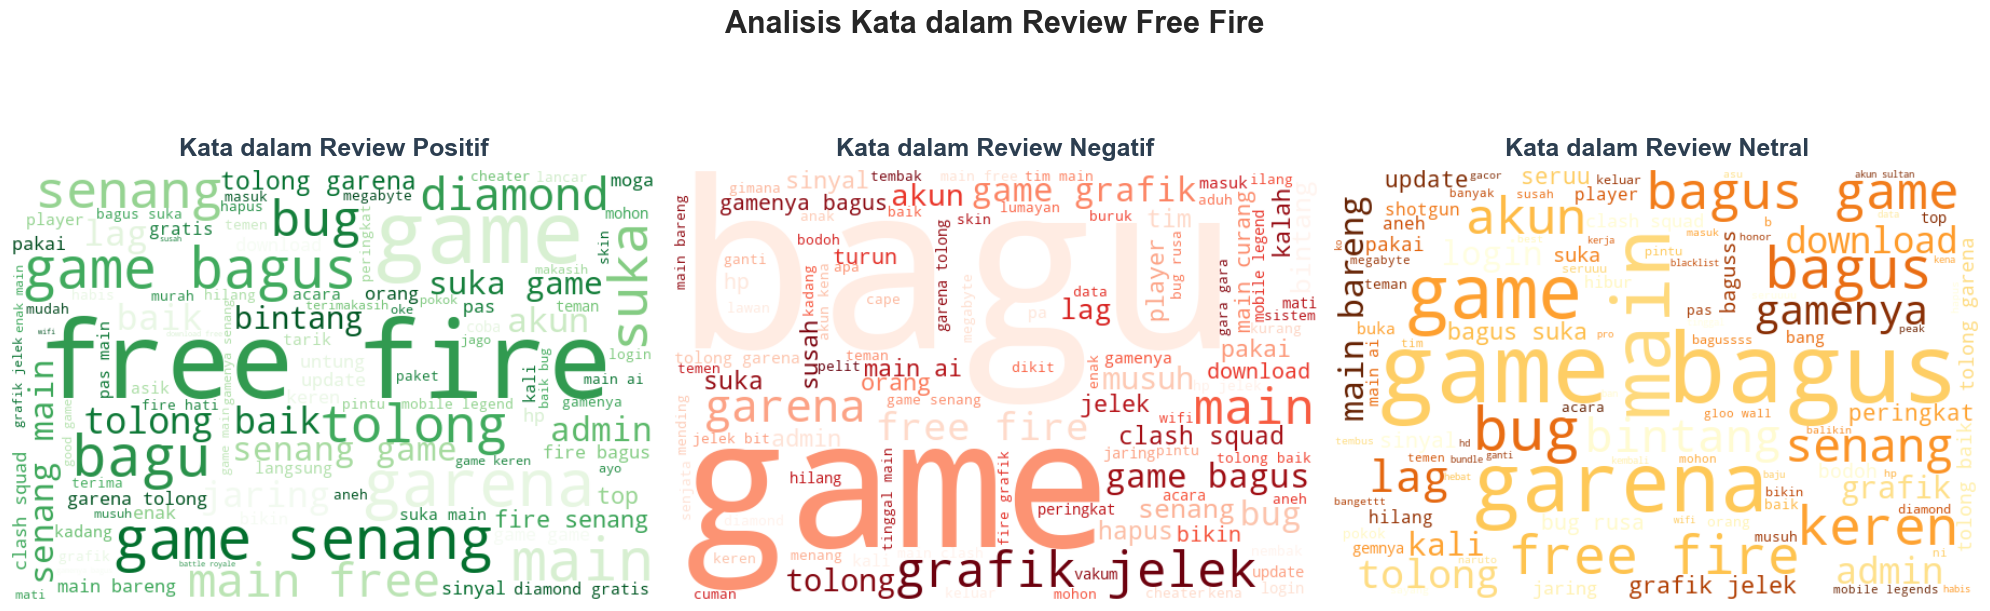

In [117]:
# Kumpulkan teks berdasarkan kategori sentimen
positive_review = ' '.join(df_clean[df_clean['sentiment'] == 'positif']['final_text'].astype(str))
negative_review = ' '.join(df_clean[df_clean['sentiment'] == 'negatif']['final_text'].astype(str))
netral_review = ' '.join(df_clean[df_clean['sentiment'] == 'netral']['final_text'].astype(str))

# Buat figure dengan layout horizontal (1 baris, 3 kolom)
plt.figure(figsize=(20, 7))  # Ukuran yang lebih lebar untuk layout horizontal

# WordCloud untuk sentimen positif (hijau)
plt.subplot(1, 3, 1)  # 1 baris, 3 kolom, posisi 1
pos_cloud = WordCloud(
    width=600, height=400,
    background_color='white',
    colormap='Greens',  # Warna hijau
    max_words=100,
    contour_width=1,
    contour_color='steelblue'
).generate(positive_review)
plt.imshow(pos_cloud, interpolation='bilinear')
plt.title('Kata dalam Review Positif', fontsize=18, fontweight='bold', color='#2c3e50', pad=10)
plt.axis('off')

# WordCloud untuk sentimen negatif (merah)
plt.subplot(1, 3, 2)  # 1 baris, 3 kolom, posisi 2
neg_cloud = WordCloud(
    width=600, height=400,
    background_color='white',
    colormap='Reds',  # Warna merah
    max_words=100,
    contour_width=1,
    contour_color='steelblue'
).generate(negative_review)
plt.imshow(neg_cloud, interpolation='bilinear')
plt.title('Kata dalam Review Negatif', fontsize=18, fontweight='bold', color='#2c3e50', pad=10)
plt.axis('off')

# WordCloud untuk sentimen netral (kuning/oranye)
plt.subplot(1, 3, 3)  # 1 baris, 3 kolom, posisi 3
neu_cloud = WordCloud(
    width=600, height=400,
    background_color='white',
    colormap='YlOrBr',  # Warna kuning-oranye
    max_words=100,
    contour_width=1,
    contour_color='steelblue'
).generate(netral_review)
plt.imshow(neu_cloud, interpolation='bilinear')
plt.title('Kata dalam Review Netral', fontsize=18, fontweight='bold', color='#2c3e50', pad=10)
plt.axis('off')

# Judul utama
plt.suptitle('Analisis Kata dalam Review Free Fire', fontsize=22, fontweight='bold', y=0.98)

# Atur layout dan simpan
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Menyesuaikan margin untuk judul utama
plt.savefig('sentiment_wordclouds_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()

```
Review Positif
```
- Jika kita lihat kata kata yang sering muncul adalah senang, bagus, suka, baik dll.
- Terus jika kita lihat ada kata kata bug dan juga tolong, mungkin dia berharap developer nya memperbaiki bug atau masalah yang lainnya secara baik baik, ngasih bintang lah intinya.
- Apalagi kata gratis tuh wkwk itumah fix bocil minta diamond ff itumah buat beli alok.

```
Review Negatif
```
- Untuk yang negatif bisa kita lihat banyak sekali kata kata grafik jelek dan banyak bot, ini menandakan bahwa katanya ff tuh burik, haters kali ini ya. Terus banyak sekali kata kata kalah, susah yang itu artinya aku gak tau ya mungkin player nya aja yang kureng jago atau emang ff nya yang susah dan banyak player pro.
- Terus meskipun negatif ada juga yang memusi deh aneh bagus tuh memuji terus banyak yang bilang hp jelek, haduh.

```
Review Netral
```
- Kalau ini semuanya pasti ada sih karena ini netral mungkin mereka bilang jelek tapi berharap perbaikan, bilang bagus juga mereka ngerasa jelek game nya atau sistem nya.

# **Data Spliting**

In [118]:
# Menyiapkan data untuk pemodelan
X = df_clean['final_text'] 
y = df_clean['sentiment'] # Feature Dependen (Target)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verifikasi ukuran setelah split
print(f'Setelah split - X_train: {len(X_train)}, y_train: {len(y_train)}')
print(f'Setelah split - X_test: {len(X_test)}, y_test: {len(y_test)}')

Setelah split - X_train: 6474, y_train: 6474
Setelah split - X_test: 1619, y_test: 1619


# **Ektrasi Fitur**

## **Menggunakan TF-IDF**

In [119]:
tfidf = TfidfVectorizer(
    max_features = 3000, # Membatasi fitur ke 3000 kata kata paling penting
    min_df = 3, # Mengabaikan kata yang muncul kurang dari 3 dokumen
    max_df = 0.85, # Mengabaikan kata yang muncul di 85% dokumen seperti stopwords
    ngram_range = (1, 3), 
    stop_words = 'english' # Hapus stopwords bahasa inggris karena aku pake bahasa indonesia
)

# Eksekusikan kepada fitur X_train dan juga X_test
Xtrain_tfidf = tfidf.fit_transform(X_train)
Xtest_tfidf = tfidf.transform(X_test)

# Melihat jumlah baris atau review yang di ambil
print(f'Jumlah review yang di ambil oleh TF-IDF data latih  adalah {Xtrain_tfidf.shape}')
print(f'Jumlah review yang di ambil oleh TF-IDF data uji adalah {Xtest_tfidf.shape}')

Jumlah review yang di ambil oleh TF-IDF data latih  adalah (6474, 2980)
Jumlah review yang di ambil oleh TF-IDF data uji adalah (1619, 2980)


- Disini kita bia lihat dari semua gabungan review baik itu test maupun train, kaya kata yang lolos atau yang relevant hanya ada **2894** kata unik, ini karena aku menyeleksi kata dengan parameter yang ketat, karena tujuan nya ku spfesifik ke game Free Fire nya bukan ke kata kata umum.

## **Menggunakan Bag Of Word (BOW)**

In [120]:
# Inisialisais Code
cv = CountVectorizer(
    max_features = 3000, 
    min_df = 3,
    max_df = 0.85,
    ngram_range = (1, 3),
    stop_words = 'english'
)

# Eksekusi lagi
Xtrain_cv = cv.fit_transform(X_train)
Xtest_cv = cv.transform(X_test)

print(f'Jumlah review yang di ambil oleh Count Vectorizer data latih  adalah {Xtrain_cv.shape}')
print(f'Jumlah review yang di ambil oleh Count Vectorizer data uji adalah {Xtest_cv.shape}')

Jumlah review yang di ambil oleh Count Vectorizer data latih  adalah (6474, 2980)
Jumlah review yang di ambil oleh Count Vectorizer data uji adalah (1619, 2980)


- Ini sama karena kemungkinan parameter nya juga sama jadi nya sama deh.

# **Pelatihan Model**

In [121]:
# Menyimpan para model ke dalam list
models = [
    LogisticRegression(random_state=42),
    LinearSVC(random_state=42),
    SGDClassifier(random_state=42),
    MultinomialNB(),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42)
]

# Menyimpan fitur ke dalam dictionary
features = {
    'TF-IDF': (Xtrain_tfidf, Xtest_tfidf, y_train, y_test),
    'Count Vectorizer': (Xtrain_cv, Xtest_cv, y_train, y_test)
}

# Distribusi data yang di inginkan
distributions = ['80/20', '70/30']

# DataFrame hasil buat list untuk menyimpan hasil
results_list = []

print('MEMULAI PELATIHAN MODEL')
print('=' * 60)

total_start_time = time.time()

for feature_name, (X_train_feat, X_test_feat, y_train_feat, y_test_feat) in features.items():
    print(f'\nEKSTRAKSI FITUR: {feature_name}')
    print('-' * 40)
    
    for distribution in distributions:
        print(f'\nDISTRIBUSI DATA: {distribution}')
        
        # Membuat split baru berdasarkan distribusi
        if distribution == '80/20':
            X_tr, X_te, y_tr, y_te = X_train_feat, X_test_feat, y_train_feat, y_test_feat
        else:
            X_temp = df_clean['final_text']
            y_temp = df_clean['sentiment']
            X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
                X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp
            )
            
            # PERBAIKAN: Transform dengan vectorizer yang tepat
            if feature_name == 'TF-IDF':
                # Buat vectorizer baru untuk split 70/30
                tfidf_70 = TfidfVectorizer(
                    max_features=3000,
                    min_df=3, 
                    max_df=0.85,
                    ngram_range=(1, 3),
                    stop_words='english'
                )
                X_tr = tfidf_70.fit_transform(X_train_temp)
                X_te = tfidf_70.transform(X_test_temp)
            else:  # Count Vectorizer
                # Buat vectorizer baru untuk split 70/30
                cv_70 = CountVectorizer(
                    max_features=3000,
                    min_df=3,
                    max_df=0.85, 
                    ngram_range=(1, 3),
                    stop_words='english'
                )
                X_tr = cv_70.fit_transform(X_train_temp)
                X_te = cv_70.transform(X_test_temp)
            
            y_tr, y_te = y_train_temp, y_test_temp
        
        print(f'Train samples: {X_tr.shape[0]}, Test samples: {X_te.shape[0]}')
        
        for model in models:
            model_name = model.__class__.__name__
            
            try:
                print(f'Training {model_name:25}', end=' ')
                
                # Start Time 
                start_time = time.time()
                
                # Training model
                model.fit(X_tr, y_tr)
                
                # Prediksi
                y_train_pred = model.predict(X_tr)
                y_test_pred = model.predict(X_te)
                
                # Evaluasi Model
                train_acc = accuracy_score(y_tr, y_train_pred)
                test_acc = accuracy_score(y_te, y_test_pred)
                precision = precision_score(y_te, y_test_pred, average='weighted')
                recall = recall_score(y_te, y_test_pred, average='weighted')
                f1 = f1_score(y_te, y_test_pred, average='weighted')
                
                # Hitung waktu training
                train_time = time.time() - start_time
                
                # Simpan hasil ke list
                results_list.append({
                    'Model': model_name,
                    'Ekstraksi Fitur': feature_name,
                    'Distribusi Data': distribution,
                    'Akurasi Train': round(train_acc, 4),
                    'Akurasi Test': round(test_acc, 4),
                    'Precision': round(precision, 4),
                    'Recall': round(recall, 4),
                    'F1-Score': round(f1, 4),
                    'Waktu(s)': round(train_time, 2)
                })
                
                print(f'Success (Akurasi: {test_acc:.4f}, Waktu: {train_time:.2f}s)')
                
            except Exception as e:
                print(f'Error: {str(e)}')
                
                # Simpan error ke list
                results_list.append({
                    'Model': model_name,
                    'Ekstraksi Fitur': feature_name,
                    'Distribusi Data': distribution,
                    'Akurasi Train': None,
                    'Akurasi Test': None,
                    'Precision': None,
                    'Recall': None,
                    'F1-Score': None,
                    'Waktu(s)': None
                })

# Buat DataFrame dari list
results_df = pd.DataFrame(results_list)

# Hasil akhir
total_time = time.time() - total_start_time
print('\n' + '=' * 60)
print('TRAINING SELESAI')
print(f'Total waktu eksekusi: {total_time:.2f} detik')
print(f'Eksperimen berhasil: {len(results_df[results_df["Akurasi Test"].notna()])}')
print(f'Eksperimen gagal: {len(results_df[results_df["Akurasi Test"].isna()])}')

print('\nHASIL PELATIHAN MODEL:')
print('=' * 60)
display(results_df)

MEMULAI PELATIHAN MODEL

EKSTRAKSI FITUR: TF-IDF
----------------------------------------

DISTRIBUSI DATA: 80/20
Train samples: 6474, Test samples: 1619
Training LogisticRegression        Success (Akurasi: 0.8604, Waktu: 0.07s)
Training LinearSVC                 Success (Akurasi: 0.8536, Waktu: 0.04s)
Training SGDClassifier             Success (Akurasi: 0.8672, Waktu: 0.03s)
Training MultinomialNB             Success (Akurasi: 0.7270, Waktu: 0.01s)
Training RandomForestClassifier    Success (Akurasi: 0.8252, Waktu: 1.08s)
Training DecisionTreeClassifier    Success (Akurasi: 0.7795, Waktu: 0.13s)

DISTRIBUSI DATA: 70/30
Train samples: 5665, Test samples: 2428
Training LogisticRegression        Success (Akurasi: 0.8484, Waktu: 0.05s)
Training LinearSVC                 Success (Akurasi: 0.8431, Waktu: 0.03s)
Training SGDClassifier             Success (Akurasi: 0.8604, Waktu: 0.02s)
Training MultinomialNB             Success (Akurasi: 0.7216, Waktu: 0.02s)
Training RandomForestClassifier 

,Model,Ekstraksi Fitur,Distribusi Data,Akurasi Train,Akurasi Test,Precision,Recall,F1-Score,Waktu(s)
0,LogisticRegression,TF-IDF,80/20,0.9237,0.8604,0.8600,0.8604,0.8595,0.07
1,LinearSVC,TF-IDF,80/20,0.9640,0.8536,0.8537,0.8536,0.8534,0.04
2,SGDClassifier,TF-IDF,80/20,0.9478,0.8672,0.8669,0.8672,0.8664,0.03
3,MultinomialNB,TF-IDF,80/20,0.8071,0.7270,0.7403,0.7270,0.6958,0.01
4,RandomForestClassifier,TF-IDF,80/20,0.9918,0.8252,0.8307,0.8252,0.8236,1.08
5,DecisionTreeClassifier,TF-IDF,80/20,0.9918,0.7795,0.7826,0.7795,0.7790,0.13
6,LogisticRegression,TF-IDF,70/30,0.9229,0.8484,0.8478,0.8484,0.8474,0.05
7,LinearSVC,TF-IDF,70/30,0.9631,0.8431,0.8436,0.8431,0.8430,0.03
8,SGDClassifier,TF-IDF,70/30,0.9469,0.8604,0.8601,0.8604,0.8597,0.02
9,MultinomialNB,TF-IDF,70/30,0.8095,0.7216,0.7369,0.7216,0.6906,0.02


- Disini karena kebanyakakan mungkin aku bakal menggunakan fungsi untuk mencari model terbaik dari berbagai aspek nya.

### **Mencari Model Terbaik**

In [122]:
def mencari_model_terbaik(results_df):
    """
    Fungsi ini untuk mencari model terbaik berdasarkan beberapa aspek yang akan aku tambahkan.
    """

    # Filter model dengan akurasi tertinggi yang minimal di 85%
    print('Model dengan akurasi tertinggi atau di atas 85%')
    high_accuracy = results_df[results_df['Akurasi Test'] >= 0.85].copy()  # Tambah .copy()
    print(f'Ditemukan {len(high_accuracy)} model dengan akurasi paling tertinggi')

    # MEncari model yang overfitting nya rendah atau gap train test nya kecil
    print('Model dengan gap train dan test paling kecil')
    high_accuracy['Gap'] = high_accuracy['Akurasi Train'] - high_accuracy['Akurasi Test']
    low_overfitting = high_accuracy[high_accuracy['Gap'] <= 0.05]
    print(f'Ditemukan {len(low_overfitting)} model dengan gap paling kecil')

    # Mencari model dengan F1 Score paling tinggi
    print('Model dengan F1 Score paling tinggi')
    if len(low_overfitting) > 0:
        best_model = low_overfitting.loc[low_overfitting['F1-Score'].idxmax()]
    else:
        best_model = high_accuracy.loc[high_accuracy['Gap'].idxmin()]

    # Output
    print('=' * 60)
    print('Model Terbaik Dari Beberapa Aspek')
    print(f'Model Terbaik adalah : {best_model["Model"]}')
    print(f'Ekstraksi Fitur Terbaik adalah : {best_model["Ekstraksi Fitur"]}')
    print(f'Distribusi Data Terbaik adalah : {best_model["Distribusi Data"]}')
    print(f'Akurasi Train Terbaik adalah : {best_model["Akurasi Train"]}')
    print(f'Akurasi Test Terbaik adalah : {best_model["Akurasi Test"]}')
    print(f'F1 Score Terbaik adalah : {best_model["F1-Score"]}')
    print(f'Waktu Terbaik adalah : {best_model["Waktu(s)"]} detik')
    print(f'Model dengan Overfitting paling rendah adalah : {best_model["Gap"]}')

    return best_model

# Memanggil fungsi
best_model = mencari_model_terbaik(results_df)

Model dengan akurasi tertinggi atau di atas 85%
Ditemukan 10 model dengan akurasi paling tertinggi
Model dengan gap train dan test paling kecil
Ditemukan 0 model dengan gap paling kecil
Model dengan F1 Score paling tinggi
Model Terbaik Dari Beberapa Aspek
Model Terbaik adalah : LogisticRegression
Ekstraksi Fitur Terbaik adalah : TF-IDF
Distribusi Data Terbaik adalah : 80/20
Akurasi Train Terbaik adalah : 0.9237
Akurasi Test Terbaik adalah : 0.8604
F1 Score Terbaik adalah : 0.8595
Waktu Terbaik adalah : 0.07 detik
Model dengan Overfitting paling rendah adalah : 0.06329999999999991


- Disini setelah aku menggunakan fungsi untuk mencari model dengan beberapa aspek yang berbeda, ternyata mengejutkannya di temukan bahwa **`LogisticRegression`** yang paling baik, padahal aku berharap nya **`SGDClasifier`** yang lebih baik tapi mungkin dia memiliki gap overfitting yang lumayan gede. Jadi aku bakal menggunakan LogisticRegression saja.
- Tapi disini karena submission menungtut model di atas 85% maka ku bakal menggunakan **`SGDClasifier`**.

## **Pengujian terhadap Model SGDClassifier (TF-IDF: 80/20)**

In [128]:
# Split data untuk model terbaik kita
X_final = df_clean['final_text']
y_final = df_clean['sentiment']

# Split data dengan distribusi 80/20 untuk model kita juga
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

# Ekstraksi fitur menggunakan TF-IDF ektraksi fitur terbaik
best_tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,
    min_df=3,
    max_df=0.85,
    ngram_range=(1, 3),
    stop_words='english'
)

# Transform data training dan testing
X_train_tfidf_final = best_tfidf_vectorizer.fit_transform(X_train_final)
X_test_tfidf_final = best_tfidf_vectorizer.transform(X_test_final)

# Inisialisasi dan training model SGDClassifier (model yang >85%)
best_sgd_model = SGDClassifier(random_state=42)
start_time = time.time()
best_sgd_model.fit(X_train_tfidf_final, y_train_final)
training_time = time.time() - start_time

print(f'Model SGDClassifier berhasil dilatih dalam {training_time:.2f} detik')
print(f'Data training: {X_train_tfidf_final.shape}')
print(f'Data testing: {X_test_tfidf_final.shape}')

Model SGDClassifier berhasil dilatih dalam 0.01 detik
Data training: (6474, 2980)
Data testing: (1619, 2980)


### **Evaluasi Model Terbaik**

In [129]:
# Prediksi dengan model terbaik
y_train_pred_final = best_sgd_model.predict(X_train_tfidf_final)
y_test_pred_final = best_sgd_model.predict(X_test_tfidf_final)

# Hitung metrik evaluasi
train_accuracy_final = accuracy_score(y_train_final, y_train_pred_final)
test_accuracy_final = accuracy_score(y_test_final, y_test_pred_final)
precision_final = precision_score(y_test_final, y_test_pred_final, average='weighted')
recall_final = recall_score(y_test_final, y_test_pred_final, average='weighted')
f1_score_final = f1_score(y_test_final, y_test_pred_final, average='weighted')

# Tampilkan hasil evaluasi
print(f'Akurasi Training: {train_accuracy_final:.4f} ({train_accuracy_final*100:.2f}%)')
print(f'Akurasi Testing: {test_accuracy_final:.4f} ({test_accuracy_final*100:.2f}%)')
print(f'Precision: {precision_final:.4f}')
print(f'Recall: {recall_final:.4f}')
print(f'F1-Score: {f1_score_final:.4f}')
print(f'Waktu Training: {training_time:.2f} detik')
print(f'Overfitting Gap: {train_accuracy_final - test_accuracy_final:.4f}')

# Classification Report detail
print('\nClassification Report Detail:')
print('=' * 60)
print(classification_report(y_test_final, y_test_pred_final))

Akurasi Training: 0.9478 (94.78%)
Akurasi Testing: 0.8672 (86.72%)
Precision: 0.8669
Recall: 0.8672
F1-Score: 0.8664
Waktu Training: 0.01 detik
Overfitting Gap: 0.0806

Classification Report Detail:
              precision    recall  f1-score   support

     negatif       0.89      0.83      0.86       557
      netral       0.79      0.78      0.78       329
     positif       0.89      0.94      0.91       733

    accuracy                           0.87      1619
   macro avg       0.85      0.85      0.85      1619
weighted avg       0.87      0.87      0.87      1619



- Yaps meskipun bisa kita lihat disini indikasi overfitting nya lumayan parah tapi yasudah lah gak papa yang penting akurasi nya memenuhi syarat saja.

### **Pengujian Dengan Kalimat Baru**

In [131]:
# Fungsi preprocessing pipeline yang sudah diperbaiki
def preprocessing_pipeline_final(text):
    """
    Pipeline preprocessing lengkap untuk teks baru
    """
    try:
        cleaned = clean_text(text)
        case_folded = case_folding(cleaned)
        normalized = normalize_slang(case_folded)
        tokenized = tokenization(normalized)
        stopwords_removed = filtering_stopwords(tokenized)
        stemmed = stemming(stopwords_removed)
        final_text = to_sentence(stemmed)
        return final_text
    except Exception as e:
        print(f'Error dalam preprocessing: {e}')
        return ""

# Fungsi testing dengan model terbaik SGDClassifier
def test_sentiment_final(text):
    """
    Fungsi untuk menguji model terbaik dengan teks baru atau review baru
    """
    try:
        # Preprocessing teks
        processed_text = preprocessing_pipeline_final(text)
        
        if not processed_text.strip():
            return 'Teks kosong setelah preprocessing', processed_text
        
        # Transform dengan TF-IDF vectorizer
        text_vectorized = best_tfidf_vectorizer.transform([processed_text])
        
        # Prediksi sentiment
        prediction = best_sgd_model.predict(text_vectorized)[0]
        
        # Prediksi probabilitas untuk confidence (jika tersedia)
        try:
            # SGD tidak selalu punya predict_proba, gunakan decision_function
            decision_score = best_sgd_model.decision_function(text_vectorized)[0]
            confidence = max(decision_score) if len(decision_score) > 1 else abs(decision_score[0])
        except:
            confidence = 1.0  # Default confidence
        
        return prediction, processed_text, confidence
        
    except Exception as e:
        return f"Error: {str(e)}", processed_text, 0.0

test_reviews = [
    'Game nya burik banget, banyak bug dan lag juga tolong lah free fire',
    'Game nya sangat seru, aku senang sekali bermain free fire', 
    'Game nya lumayan menarik, tapi banyak yang curang, semoga bisa di perbaiki ya admin',
    'Game nya banyak cheater, player nya juga kaya bot',
    'Free fire adalah game terbaik yang pernah ada, grafik bagus banget'
]

for i, review in enumerate(test_reviews, 1):
    prediction, processed, confidence = test_sentiment_final(review)
    print(f'{i}. Review Asli:')
    print(f'   "{review}"')
    print(f'   Setelah Preprocessing: "{processed}"')
    print(f'   Prediksi Sentiment: {prediction}')
    print(f'   Confidence Score: {confidence:.3f}')
    print()

1. Review Asli:
   "Game nya burik banget, banyak bug dan lag juga tolong lah free fire"
   Setelah Preprocessing: "game grafik jelek bug lag tolong free fire"
   Prediksi Sentiment: negatif
   Confidence Score: -0.125

2. Review Asli:
   "Game nya sangat seru, aku senang sekali bermain free fire"
   Setelah Preprocessing: "game senang senang main free fire"
   Prediksi Sentiment: positif
   Confidence Score: 2.330

3. Review Asli:
   "Game nya lumayan menarik, tapi banyak yang curang, semoga bisa di perbaiki ya admin"
   Setelah Preprocessing: "game lumayan tarik curang moga baik admin"
   Prediksi Sentiment: positif
   Confidence Score: 2.120

4. Review Asli:
   "Game nya banyak cheater, player nya juga kaya bot"
   Setelah Preprocessing: "game main curang player main ai"
   Prediksi Sentiment: negatif
   Confidence Score: 1.162

5. Review Asli:
   "Free fire adalah game terbaik yang pernah ada, grafik bagus banget"
   Setelah Preprocessing: "free fire game baik grafik bagus"
   Pred

- Dapat disimpulkan ini sudah lumayan baik, model **`SGDClassifier`** mampu menebak dengan cukup baik, meskipun dia susah sekali untuk menebak class netral, karena data netral sangat sedikit.
- Terus ada yang kocak menarik kok di bikin tarik wkwkwk ada ada saja.

# **Kesimpulan**

- Proyek analisis sentiment review aplikasi game Free Fire ini mungkin bisa di bilang berhasil mengembangkan sistem analisis sentimt dengan proforma yang memenuhi standar submission, meskipun tidak sampai di atas 90% akurasinya tapi aku bangga karena sudah berhasil sejauh ini bisa merasakan membangun sebuah sistem analisis sentimen yang sedeerhana tapi bakal aku kenang karena mengingat aku dari jurusan Manajemen Bisnis.